In [1]:
from api.Query_condition import QuerySemose, score_accesibility
from api.zicbang import oneroom_df

In [2]:
test = oneroom_df('아주대학교')
test

,images_thumbnail,title,address,item_id,deposit,rent,area_p,building_floor,floor,lat,lng,reg_date,sales_type,manage_cost,distance
346,https://ic.zigbang.com/ic/items/38664480/1.jpg,oO청춘Oo 주..차..끝 bb 컨..디..션 끝bb,경기도 수원시 팔달구 인계동,38664480,500,60,8,5,3,37.270636,127.029279,2023-11-09T17:55:16+09:00,월세,10,29.550152
347,https://ic.zigbang.com/ic/items/38678246/1.jpg,인계동 1.5룸 l 풀옵션 l 채광 맛집 l 예쁜 인테리어,경기도 수원시 팔달구 인계동,38678246,500,60,8,5,3,37.270630,127.029304,2023-11-10T20:03:47+09:00,월세,10,29.533640
349,https://ic.zigbang.com/ic/items/38708220/1.jpg,드라마센터 부근에 있는 럭셔리 원룸이예요,경기도 수원시 팔달구 인계동,38708220,500,60,10,5,3,37.271117,127.028661,2023-11-24T13:59:02+09:00,월세,10,29.605242
351,https://ic.zigbang.com/ic/items/38761479/1.jpg,2층 방2 도배 장판 욕실타일교체 융자무 즉시입주 채광좋음,경기도 수원시 영통구 매탄동,38761479,8000,0,14,3,2,37.270671,127.045936,2023-11-23T11:30:01+09:00,전세,0,20.478067
359,https://ic.zigbang.com/ic/items/38574405/1.jpg,II반전세가능II안심투룸II전세권설정가능II임대인실거주II,경기도 수원시 팔달구 인계동,38574405,16000,0,15,7,6,37.270932,127.028777,2023-11-29T17:39:52+09:00,전세,10,29.697203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,https://ic.zigbang.com/ic/items/38832723/1.jpg,2018년 신축 풀옵션 원룸. 12월 입주가능. 테라스,경기도 수원시 팔달구 우만동,38832723,5000,30,8,5,5,37.289329,127.030385,2023-11-24T14:15:17+09:00,월세,7,22.409570
821,https://ic.zigbang.com/ic/items/38839006/1.jpg,"KK ,분리형 깨끗한 풀옵션원룸,빠른입주가,넓고,경기대근처",경기도 수원시 장안구 연무동,38839006,500,41,7,5,2,37.293075,127.029400,2023-12-03T07:21:27+09:00,월세,9,26.917108
838,https://ic.zigbang.com/ic/items/38826550/1.jpg,"KK 신축풀옵션원룸,깨끗,현관보안,인터넷 경기대가까워요",경기도 수원시 장안구 연무동,38826550,300,32,6,3,1,37.296584,127.032857,2023-12-03T07:40:20+09:00,월세,6,27.953643
839,https://ic.zigbang.com/ic/items/38934496/1.jpg,"신축급원룸, 빠른입주, 깨끗함,경기대",경기도 수원시 장안구 연무동,38934496,300,30,5,3,3,37.296627,127.031189,2023-12-02T17:59:06+09:00,월세,8,29.364225


In [3]:
import pandas as pd
df = test
df = df[['deposit', 'rent', 'area_p', 'lat', 'lng', 'manage_cost']]
df = df.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)

In [4]:
from sklearn.cluster import KMeans
import folium
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Min-Max 스케일링을 통해 데이터 정규화
# 위도, 경도를 제외한 피처만 사용
features = df[['deposit', 'rent', 'area_p','manage_cost']]
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# 정규화된 데이터를 기반으로 K-Means 클러스터링
kmeans = KMeans(n_clusters=4,  init='k-means++')
kmeans.fit(normalized_features)
df['cluster'] = kmeans.labels_

# 색상 맵 정의
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'darkblue', 'lightblue', 'black']

# 지도 생성
m = folium.Map(location=[37.277799, 127.028034], zoom_start=15)  # 지도 초기 위치 설정

# 클러스터별로 데이터프레임을 나누기
for cluster_id in df['cluster'].unique():
    cluster_df = df[df['cluster'] == cluster_id]
    
    # 각 클러스터의 위치를 지도에 표시
    for idx, row in cluster_df.iterrows():
        folium.CircleMarker(
            location=[row['lat'], row['lng']],
            radius=5,
            color=colors[cluster_id],
            fill=True,
            fill_color=colors[cluster_id],
            popup=f"Cluster {cluster_id}"
        ).add_to(m)

# 생성된 지도를 HTML 파일로 저장
m.save('map_clusters.html')


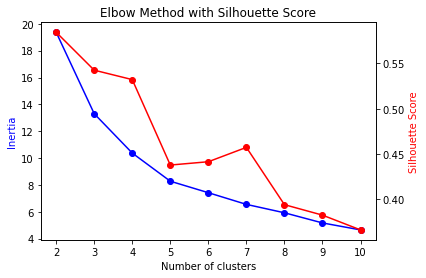

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 위도, 경도를 제외한 피처만 사용
features = df[['deposit', 'rent', 'area_p', 'manage_cost']]
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)
# 실루엣 계수와 응집도를 저장할 리스트 초기화
silhouette_scores = []
inertia = []

# 클러스터 개수 설정 범위
for n_clusters in range(2, 11):
    # K-means 클러스터링
    kmeans = KMeans(n_clusters=n_clusters,  init='k-means++')
    kmeans.fit(normalized_features)
    
    # 실루엣 계수 계산
    silhouette_avg = silhouette_score(normalized_features, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # 응집도(inertia) 계산
    inertia.append(kmeans.inertia_)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(range(2, 11), inertia, marker='o', label='Inertia', color='blue')
ax2.plot(range(2, 11), silhouette_scores, marker='o', label='Silhouette Score', color='red')

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color='blue')
ax2.set_ylabel('Silhouette Score', color='red')

plt.xticks(range(2, 11))
plt.title('Elbow Method with Silhouette Score')
plt.show()


In [6]:
print(inertia, silhouette_scores)

[19.370304702719658, 13.303926658506516, 10.372478882142245, 8.27632816261032, 7.420614592429317, 6.55067882635944, 5.924878157324378, 5.1688288269189915, 4.649380241471111] [0.5844850253284336, 0.5425723841200547, 0.5321504781336445, 0.4377316816666134, 0.4413976010244872, 0.45725837198125874, 0.3939419256055711, 0.38238565310747574, 0.36604775181883886]


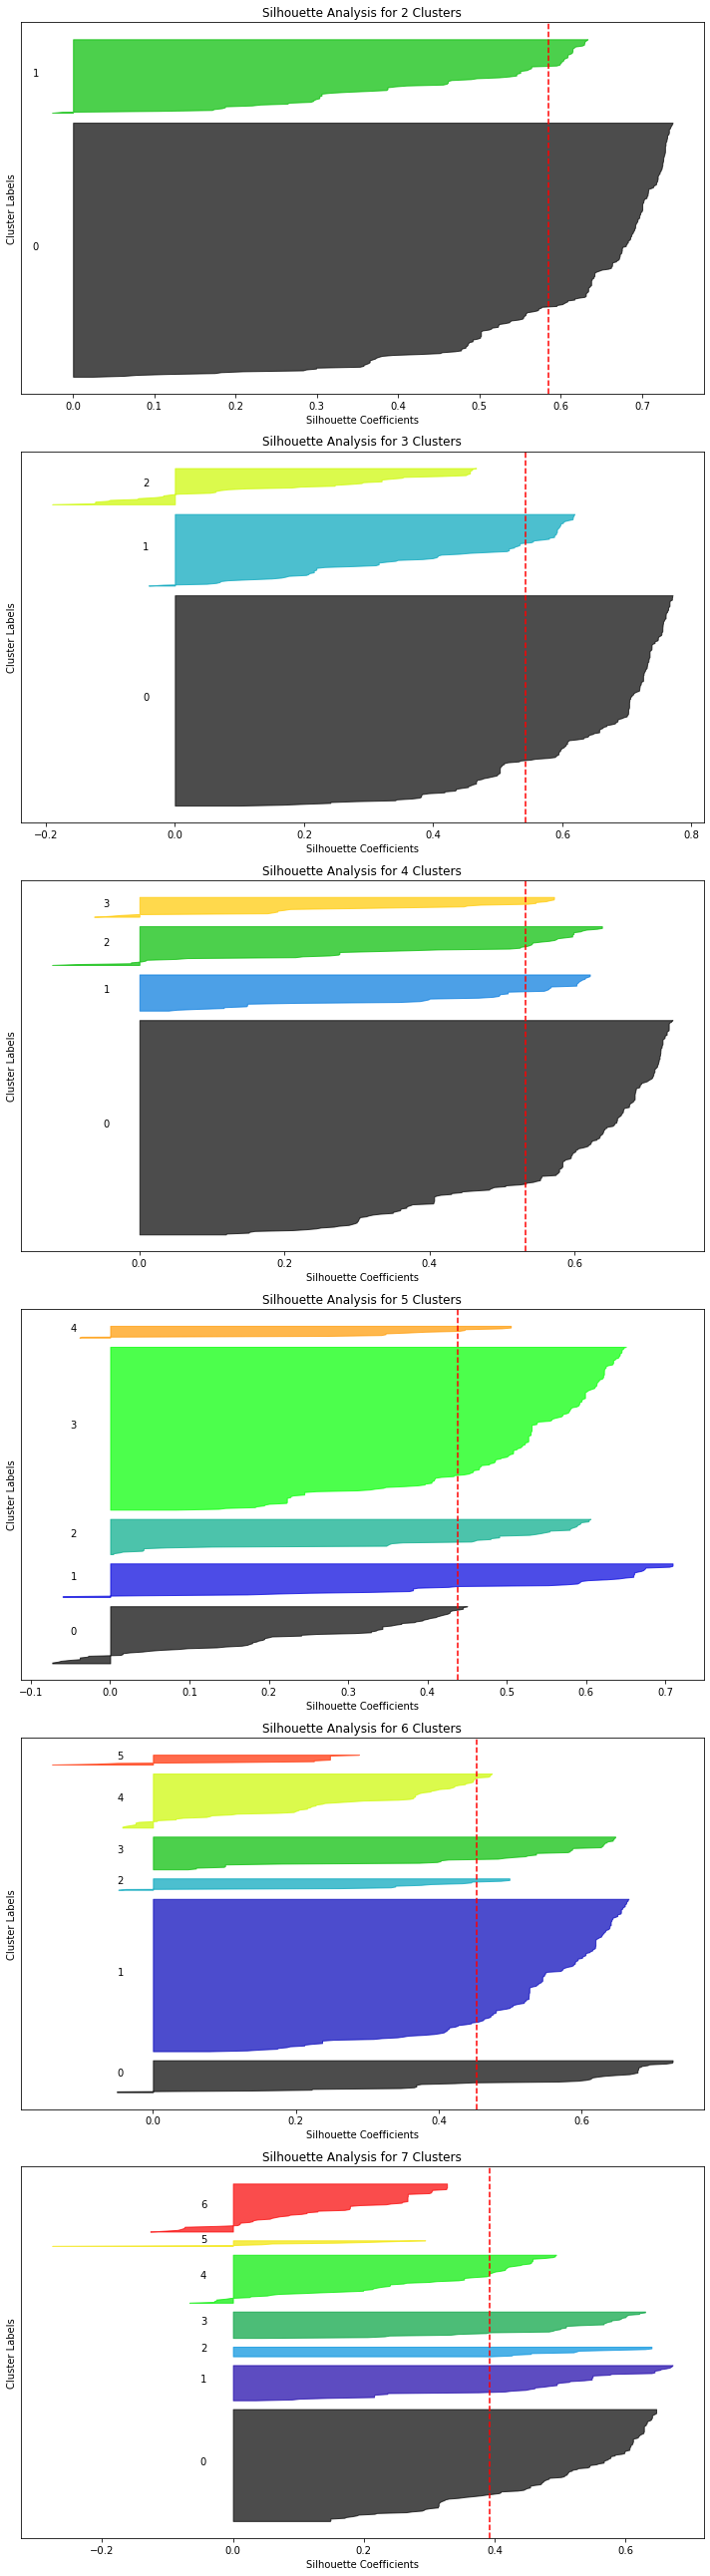

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 데이터프레임 로드 및 전처리
df = test[['deposit', 'rent', 'area_p', 'lat', 'lng', 'manage_cost']]
df = df.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)

# 위도, 경도를 제외한 피처만 사용
features = df[['deposit', 'rent', 'area_p', 'manage_cost']]
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
# 여러 클러스터 개수 설정
cluster_range = range(2, 8)

# subplot으로 여러 개의 그래프 출력
fig, axs = plt.subplots(len(cluster_range), 1, figsize=(10, len(cluster_range) * 6))

for idx, n_clusters in enumerate(cluster_range):
    # K-means 클러스터링
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(features)
    cluster_labels = kmeans.labels_

    # 각 데이터포인트의 실루엣 스코어 계산
    silhouette_vals = silhouette_samples(features, cluster_labels)

    # 클러스터별 실루엣 그래프 출력
    ax = axs[idx]

    y_lower = 10
    for i in range(n_clusters):
        # 클러스터 i에 속하는 데이터포인트의 실루엣 스코어를 정렬
        ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        ith_cluster_silhouette_vals.sort()

        size_cluster_i = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)

        # 그래프에 클러스터 i의 레이블 추가
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"Silhouette Analysis for {n_clusters} Clusters")
    ax.set_xlabel('Silhouette Coefficients')
    ax.set_ylabel('Cluster Labels')

    # 전체 실루엣 스코어의 평균값 표시
    silhouette_avg = silhouette_score(features, cluster_labels)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  # y축 레이블 제거

plt.tight_layout()
plt.show()


In [9]:
# 모델 저장
import joblib
joblib.dump(kmeans, 'kmeans_model_final_++.pkl')

['kmeans_model_final_++.pkl']

In [12]:
from sklearn.cluster import KMeans
import folium
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Min-Max 스케일링을 통해 데이터 정규화
# 위도, 경도를 제외한 피처만 사용
features = df[['deposit', 'rent', 'area_p','manage_cost']]
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# 정규화된 데이터를 기반으로 K-Means 클러스터링
kmeans = KMeans(n_clusters=4,  init='k-means++')
kmeans.fit(normalized_features)
df['cluster'] = kmeans.labels_

# 색상 맵 정의
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'darkblue', 'lightblue', 'black']

# 지도 생성
m = folium.Map(location=[37.277799, 127.028034], zoom_start=15)  # 지도 초기 위치 설정

# 클러스터별로 데이터프레임을 나누기
for cluster_id in df['cluster'].unique():
    cluster_df = df[df['cluster'] == cluster_id]
    
    # 각 클러스터의 위치를 지도에 표시
    for idx, row in cluster_df.iterrows():
        folium.CircleMarker(
            location=[row['lat'], row['lng']],
            radius=5,
            color=colors[cluster_id],
            fill=True,
            fill_color=colors[cluster_id],
            popup=f"Cluster {cluster_id}"
        ).add_to(m)

# 생성된 지도를 HTML 파일로 저장
m.save('map_clusters.html')


In [13]:
loaded_model = joblib.load('./kmeans_model.pkl')
features = df[['deposit', 'rent', 'area_p', 'manage_cost']]
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
predictions = loaded_model.predict(features)
predictions

array([4, 4, 4, 1, 3, 6, 6, 0, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 0, 0, 6, 0,
       0, 0, 0, 6, 1, 1, 0, 6, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0,
       0, 0, 0, 0, 6, 0, 1, 0, 1, 1, 0, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 5,
       0, 0, 4, 0, 6, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4,
       4, 0, 0, 0, 0, 6, 6, 6, 1, 1, 6, 6, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 6, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 4,
       4, 4, 4, 4, 4, 4, 1, 6, 6, 5, 0, 0, 0, 2, 4, 4, 4, 4, 4, 4, 6, 6,
       6, 6, 6, 0, 4, 0, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 6, 6, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 5, 2, 0, 3, 1, 4, 0, 0, 0, 1, 0, 6, 6, 3, 4,
       4, 4, 4, 4, 4, 0, 0, 0, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       2, 2, 2, 1, 4, 4, 6, 1, 0, 0, 4, 1, 1, 1, 4, 4, 3, 6, 6, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 4, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 4, 4,
       4, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 6, 4, 1, 6, 0, 0, 0, 0,

In [17]:
df = df.assign(cluster=predictions)
df

,deposit,rent,area_p,lat,lng,manage_cost,cluster
0,1000.0,71.0,13.0,37.265886,127.030711,10.0,3
1,21000.0,0.0,46.1,37.265370,127.034116,20.0,4
2,20000.0,0.0,46.1,37.265904,127.034156,20.0,4
3,20000.0,0.0,33.0,37.265864,127.033495,18.0,4
4,15000.0,30.0,45.3,37.265896,127.033502,28.0,1
...,...,...,...,...,...,...,...
895,500.0,42.0,7.0,37.297441,127.031680,8.0,3
896,500.0,40.0,7.0,37.298105,127.030218,10.0,3
897,500.0,40.0,7.0,37.297574,127.030227,10.0,3
898,4000.0,15.0,5.0,37.297658,127.030440,5.0,6
